In [5059]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5060]:
#open train and test files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5061]:
#check how the train dataset looks like
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5062]:
#check info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5063]:
#check the train dataset shape (number of rows and colulmns)
df_train.shape

(1460, 81)

In [5064]:
#check how the test dataset looks like
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5065]:
#check info of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5066]:
#check the test dataset shape (number of rows and columns)
df_test.shape

(1459, 80)

In [5067]:
#drop id column in train datasets 
df_without_id = df_train.drop('Id', axis = 1)

In [5068]:
#descriptive statistics for train dataset
df_without_id.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5069]:
#descriptive statistics for SalePrice
df_train[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


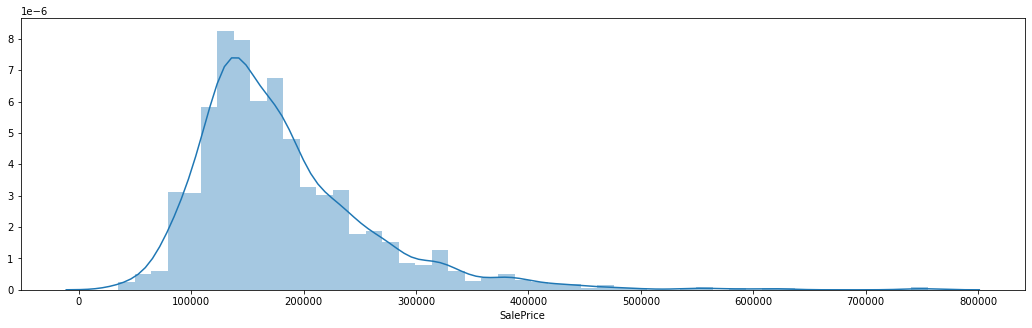

In [5070]:
#create a distplot for SalePrice
#distribution of SalePrice is asymmetrical
#median < mean that means that the distribution is right_skewed
plt.figure(figsize = (18,5))
sns.distplot(df_train['SalePrice'])

In [5071]:
#print variable names that have null values in train dataset
df_train.columns[df_train.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5072]:
#print variable names that have null values in test dataset
df_test.columns[df_test.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [5073]:
#replace missing values of LotFrontage with avarage (mean) of column in train dataset
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [5074]:
#replace missing values of MasVnrArea with avarage (mean) of column in train dataset
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [5075]:
#check the train dataset info again
#LotFrontage and MasVnrArea variables was moved from this list after replacing with mean
df_train.columns[df_train.isnull().any()].tolist()

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5076]:
#do the same procedure for the test dataset
#replace missing values of LotFrontage and MasVnrArea with avarage (mean) of column
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [5077]:
#check the test dataset info again
#LotFrontage and MasVnrArea variables were moved from this list after replacing with mean
df_test.columns[df_test.isnull().any()].tolist()

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [5078]:
#delete variables that have missing categorical data such as MasVnrType, Electrical, GarageYrBlt 
#because we cant replace NA values with mean or another symbol as it was above
df_train = df_train.drop(['MasVnrType', 'Electrical', 'GarageYrBlt'], axis = 1)

In [5079]:
#check the train dataset info again
#MasVnrType,Electrical,GarageYrBlt were deleted from this list
df_train.columns[df_train.isnull().any()].tolist()

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5080]:
#the rest of variables in the train dataset that have NA values as a name of absence of something
#for example, no fence in Fence quality or no garage in GarageType and so on
#should be renamed as "unspecified"
df_train['Alley'] = df_train['Alley'].fillna('unspecified')
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('unspecified')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('unspecified')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('unspecified')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('unspecified')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('unspecified')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('unspecified')
df_train['GarageType'] = df_train['GarageType'].fillna('unspecified')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('unspecified')
df_train['GarageQual'] = df_train['GarageQual'].fillna('unspecified')
df_train['GarageCond'] = df_train['GarageCond'].fillna('unspecified')
df_train['PoolQC'] = df_train['PoolQC'].fillna('unspecified')
df_train['Fence'] = df_train['Fence'].fillna('unspecified')
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('unspecified')

In [5081]:
#now we don't have any missing values in the train dataset
df_train.columns[df_train.isnull().any()].tolist()

[]

In [5083]:
#check float values in the train dataset
df_train.select_dtypes(include=['float64'])

,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0
2,68.0,162.0
3,60.0,0.0
4,84.0,350.0
...,...,...
1455,62.0,0.0
1456,85.0,119.0
1457,66.0,0.0
1458,68.0,0.0


In [5084]:
#covert all float values to int
df_train['LotFrontage'] = df_train['LotFrontage'].apply(np.int64)
df_train['MasVnrArea'] = df_train['MasVnrArea'].apply(np.int64)

In [5085]:
#check float values in the train dataset
df_train.select_dtypes(include=['float64'])

""
0
1
2
3
4
...
1455
1456
1457
1458


In [5086]:
#check how the new dataset looks like
#print the first 5 rows 
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,unspecified,Reg,Lvl,AllPub,...,0,unspecified,unspecified,unspecified,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,unspecified,Reg,Lvl,AllPub,...,0,unspecified,unspecified,unspecified,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,unspecified,IR1,Lvl,AllPub,...,0,unspecified,unspecified,unspecified,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,unspecified,IR1,Lvl,AllPub,...,0,unspecified,unspecified,unspecified,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,unspecified,IR1,Lvl,AllPub,...,0,unspecified,unspecified,unspecified,0,12,2008,WD,Normal,250000


In [5087]:
#do the same procedure for the test dataset
#delete variables that have missing categorical data such as MasVnrType, Electrical, GarageYrBlt 
#because we cant replace NA values with mean or another symbol as it was above
df_test = df_test.drop(['MasVnrType', 'Electrical', 'GarageYrBlt'], axis = 1)

In [5088]:
#the rest of variables in the test dataset that have NA values as a name of absence of something
#for example, no fence in Fence quality or no garage in GarageType and so on
#should be renamed as "unspecified"
df_test['Alley'] = df_test['Alley'].fillna('unspecified')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('unspecified')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('unspecified')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('unspecified')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('unspecified')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('unspecified')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('unspecified')
df_test['GarageType'] = df_test['GarageType'].fillna('unspecified')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('unspecified')
df_test['GarageQual'] = df_test['GarageQual'].fillna('unspecified')
df_test['GarageCond'] = df_test['GarageCond'].fillna('unspecified')
df_test['PoolQC'] = df_test['PoolQC'].fillna('unspecified')
df_test['Fence'] = df_test['Fence'].fillna('unspecified')
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('unspecified')

In [5089]:
#check the test dataset info again after renaming NA values to "unspecified"
#now we have 15 variables that have missing values in their columns
df_test.columns[df_test.isnull().any()].tolist()

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [5090]:
#MSZoning ,Utilities, Exterior1st, Exterior2nd, KitchenQual and Functional svariables should be deleted because we can't replace missing values to another categorical ones
df_test = df_test.drop(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1)

In [5091]:
#check the missing values in the test dataset
df_test.columns[df_test.isnull().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [5092]:
#these variables also should be deleted from the train dataset
df_train = df_train.drop(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1)

In [5093]:
#check the names of the test dataset variables with missing values
df_test.columns[df_test.isnull().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [5094]:
#in BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, GarageCars varibales missing values should be replaced with 0
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)

In [5095]:
#check the missing values in the test dataset
df_test.columns[df_test.isnull().any()].tolist()

['BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'SaleType']

In [5096]:
#missing values in BsmtUnfSF, TotalBsmtSF, GarageArea should be replaced with mean value by each column
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

In [5097]:
#missing values in SaleType should be replaced with Oth (Other Type of sale)
df_test['SaleType'] = df_test['SaleType'].fillna('Oth')

In [5098]:
#check the missing values in the test dataset
df_test.columns[df_test.isnull().any()].tolist()

[]

In [5099]:
#check float values in the test dataset
df_test.select_dtypes(include=['float64'])

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,2.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,2.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,0.0,0.0
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1.0,286.0
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,2.0,576.0
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,0.0,0.0


In [5100]:
#convert from float to int in the test dataset
df_test['LotFrontage'] = df_test['LotFrontage'].apply(np.int64)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].apply(np.int64)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].apply(np.int64)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].apply(np.int64)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].apply(np.int64)
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].apply(np.int64)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].apply(np.int64)
df_test['GarageCars'] = df_test['GarageCars'].apply(np.int64)
df_test['GarageArea'] = df_test['GarageArea'].apply(np.int64)
df_test['MasVnrArea'] = df_test['MasVnrArea'].apply(np.int64)

In [5101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [5102]:
df_train.select_dtypes(include=['float64'])

""
0
1
2
3
4
...
1455
1456
1457
1458


In [5103]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.int64)

In [5104]:
df_test.select_dtypes(include=['float64'])

""
0
1
2
3
4
...
1454
1455
1456
1457


In [5105]:
#check the correlation between SalePrice and other variables in the train dataset
corr = df_train.corr()
corr_top= corr['SalePrice'].sort_values(ascending = False)[1:15]

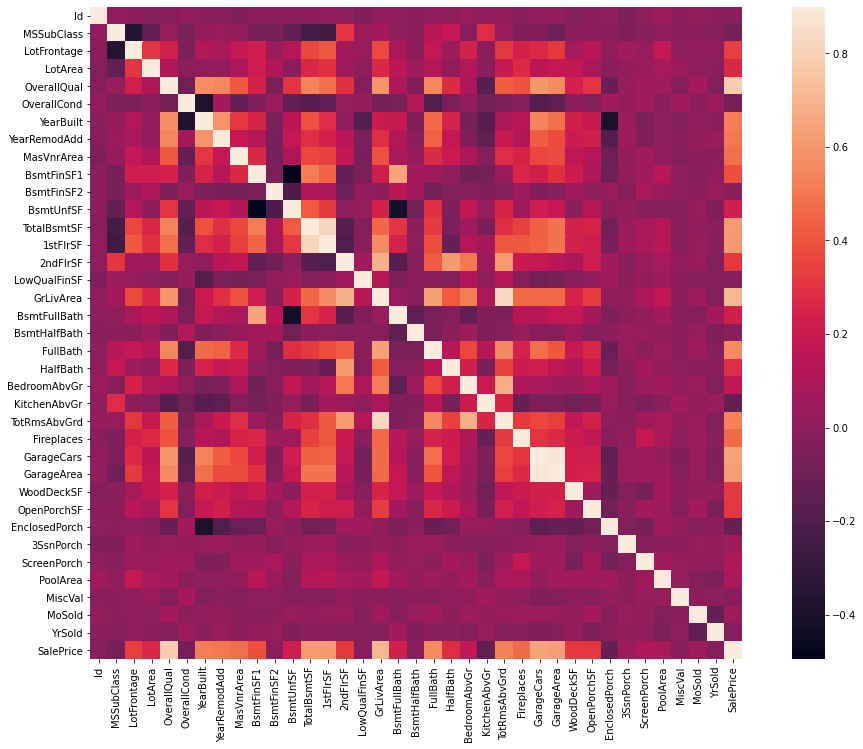

In [5106]:
#create a heatmap
plt.figure(figsize = (18,12))
sns.heatmap(corr, vmax=0.9, square=True)

In [5107]:
#correlation coefficients between SalePrice and other variables by ascending
corr_top

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475227
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334897
Name: SalePrice, dtype: float64

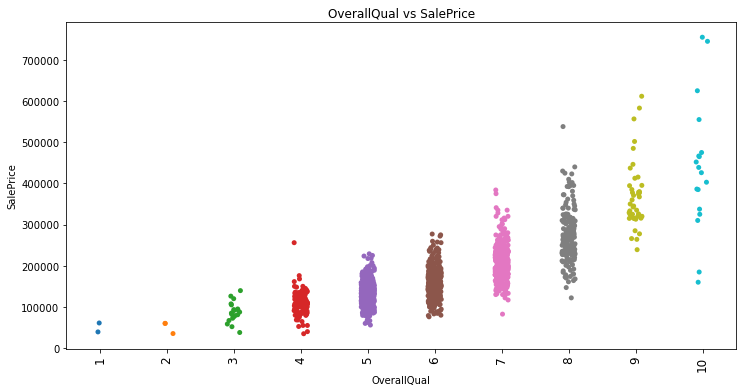

In [5108]:
#make visualization for some of the variables
#create a strip plot
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90, fontsize = 12)
plt.title('OverallQual vs SalePrice')
sns.stripplot(x='OverallQual', y='SalePrice', data = df_train)

<Figure size 864x1080 with 0 Axes>

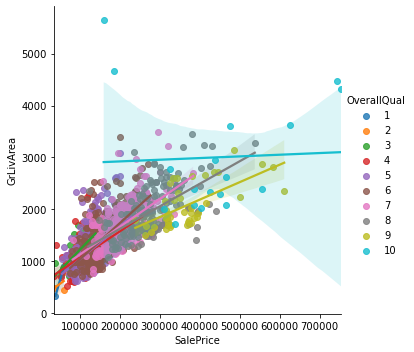

In [5109]:
#create a lmplot
plt.figure(figsize =(12,15))
sns.lmplot(x = 'SalePrice', y = 'GrLivArea', hue = 'OverallQual', data = df_train)

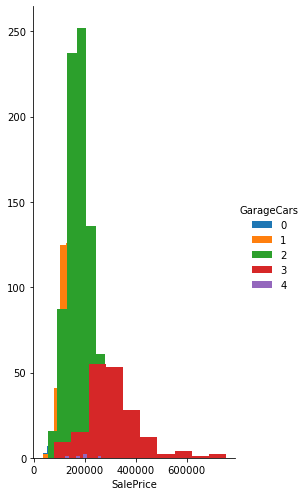

In [5110]:
#create a multi-plot grid for SalePrice and GarageCars variables
g = sns.FacetGrid(df_train, height = 7, aspect = .5, hue = 'GarageCars')
g.map(plt.hist,'SalePrice')
g.add_legend()

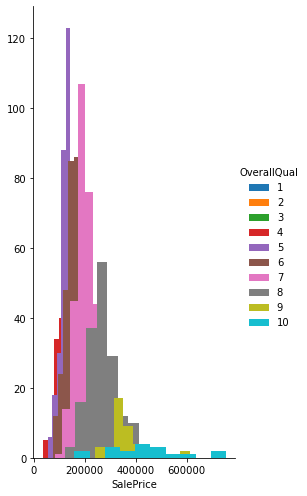

In [5111]:
#create a multi-plot grid for SalePrice and OverallQual variables
g = sns.FacetGrid(df_train, height = 7, aspect = .5, hue = 'OverallQual')
g.map(plt.hist,'SalePrice')
g.add_legend()

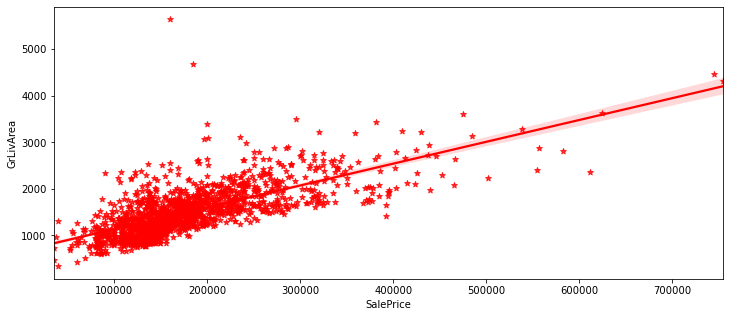

In [5112]:
#distribution of sale prices by GrLivArea
plt.figure(figsize =(12,5))
sns.regplot(x = 'SalePrice', y = 'GrLivArea', data = df_train,\
            marker = '*', color = 'r')

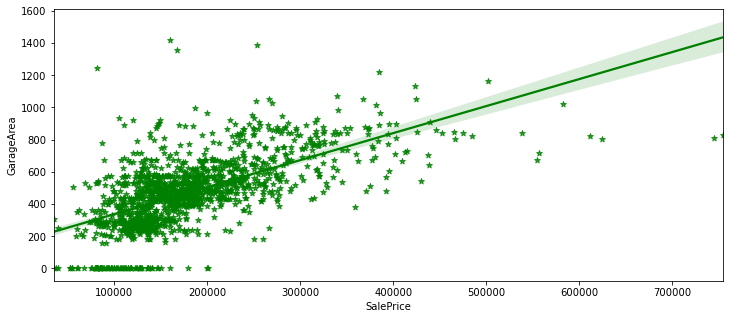

In [5113]:
#distribution of sale prices by GarageArea
plt.figure(figsize =(12,5))
sns.regplot(x = 'SalePrice', y = 'GarageArea', data = df_train,\
            marker = '*', color = 'g')

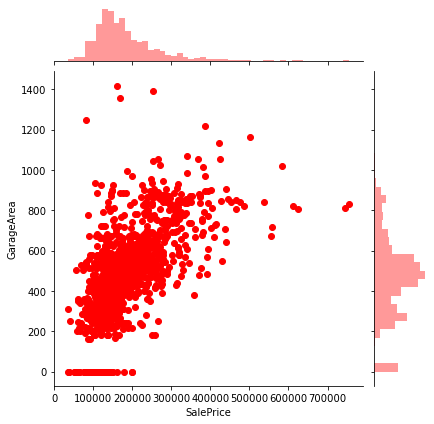

In [5114]:
#distribution of sale prices by GarageArea
sns.jointplot( x = 'SalePrice', y = 'GarageArea', color = 'r', data = df_train )

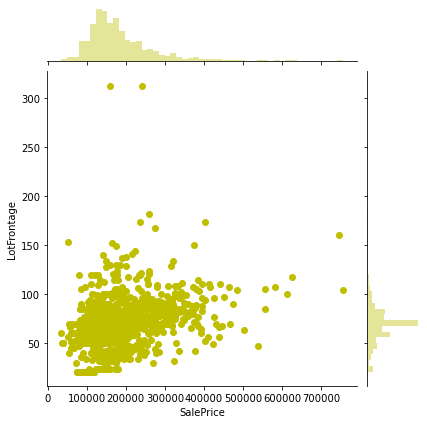

In [5115]:
#distribution of sale prices by LotFrontage
sns.jointplot( x = 'SalePrice', y = 'LotFrontage', color = 'y', data = df_train )

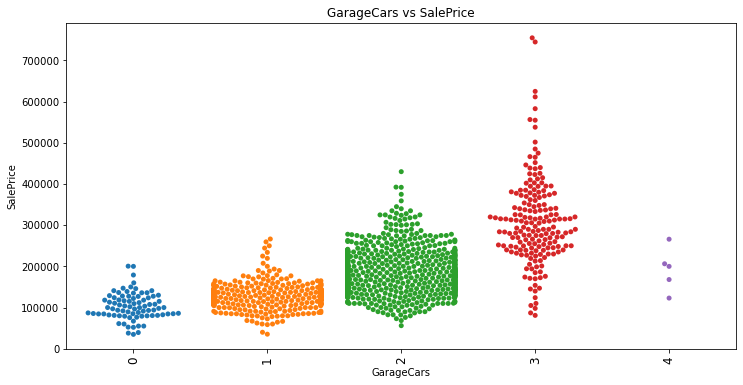

In [5116]:
#create a swarm plot
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90, fontsize = 12)
plt.title('GarageCars vs SalePrice')
sns.swarmplot(x='GarageCars', y='SalePrice', data = df_train)

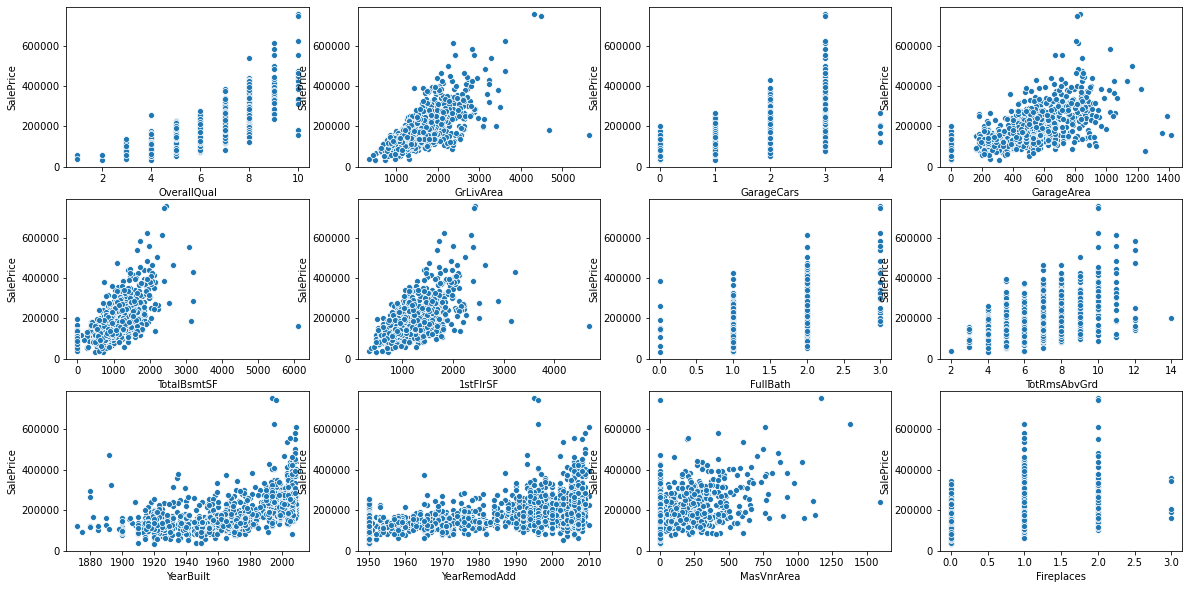

In [5117]:
#create a scatterplot for the first 12 variables that have high correlation with SalePrice
plt.figure(figsize = (20,10))

plt.subplot(3,4,1)
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

plt.subplot(3,4,2)
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

plt.subplot(3,4,3)
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = df_train)

plt.subplot(3,4,4)
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = df_train)

plt.subplot(3,4,5)
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

plt.subplot(3,4,6)
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = df_train)

plt.subplot(3,4,7)
sns.scatterplot(x = 'FullBath', y = 'SalePrice', data = df_train)

plt.subplot(3,4,8)
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df_train)

plt.subplot(3,4,9)
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)

plt.subplot(3,4,10)
sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice', data = df_train)

plt.subplot(3,4,11)
sns.scatterplot(x = 'MasVnrArea', y = 'SalePrice', data = df_train)

plt.subplot(3,4,12)
sns.scatterplot(x = 'Fireplaces', y = 'SalePrice', data = df_train)


In [5118]:
# we can remove outliers from for some variables from the train dataset but it can reduce the model accuracy
# df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
# df_train = df_train.drop(df_train[(df_train['GarageArea']>1200) & (df_train['SalePrice']<300000)].index)
# df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>3000) & (df_train['SalePrice']<450000)].index)
# df_train = df_train.drop(df_train[(df_train['1stFlrSF']>4000) & (df_train['SalePrice']<300000)].index)
# df_train = df_train.drop(df_train[(df_train['SalePrice']>600000)].index)
# df_train = df_train.drop(df_train[(df_train['MasVnrArea']>1250) & (df_train['SalePrice']<400000)].index)

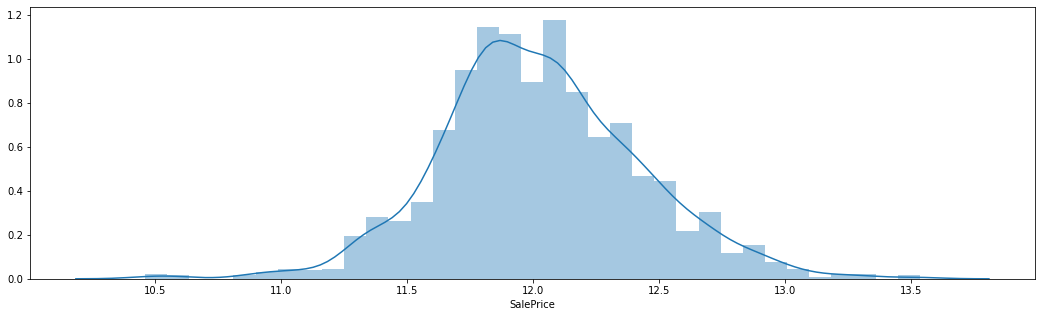

In [5121]:
#use the natural logarithm to make SalePrice distribution in the train dataset simmetrical
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.figure(figsize = (18,5))
sns.distplot(df_train['SalePrice'])

In [5122]:
#check how the SalePrice values look like after using the logarithm method
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [5123]:
target = df_train['SalePrice']
test_id = df_test['Id']

train = df_train.drop(['Id', 'SalePrice'], axis=1)
test = df_test.drop('Id', axis=1)

In [5124]:
#all_data data frame consists values of all variables from the train and test datasets besides id and SalePrice
all_data = pd.concat([train,test], axis=0).reset_index(drop = True)

In [5125]:
#check a shape of the all_data 
all_data.shape

(2919, 70)

In [5127]:
#check how data looks like after concatenation
all_data 

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,65,8450,Pave,unspecified,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,unspecified,unspecified,unspecified,0,2,2008,WD,Normal
1,20,80,9600,Pave,unspecified,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,unspecified,unspecified,unspecified,0,5,2007,WD,Normal
2,60,68,11250,Pave,unspecified,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,unspecified,unspecified,unspecified,0,9,2008,WD,Normal
3,70,60,9550,Pave,unspecified,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,unspecified,unspecified,unspecified,0,2,2006,WD,Abnorml
4,60,84,14260,Pave,unspecified,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,unspecified,unspecified,unspecified,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21,1936,Pave,unspecified,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,unspecified,unspecified,unspecified,0,6,2006,WD,Normal
2915,160,21,1894,Pave,unspecified,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,unspecified,unspecified,unspecified,0,4,2006,WD,Abnorml
2916,20,160,20000,Pave,unspecified,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,unspecified,unspecified,unspecified,0,9,2006,WD,Abnorml
2917,85,62,10441,Pave,unspecified,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,unspecified,MnPrv,Shed,700,7,2006,WD,Normal


In [5128]:
#check how many variables with categorical values the all_data data frame has
categorical_col_all_data  = print([*all_data.select_dtypes('O')])

['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [5129]:
#replace categorical values with dummies ones
all_data = pd.get_dummies(all_data, columns = categorical_col_all_data)

In [5130]:
#check how all_data data frame looks like with dummies values
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21,1936,4,7,1970,1970,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2915,160,21,1894,4,5,1970,1970,0,252,0,...,0,0,0,1,1,0,0,0,0,0
2916,20,160,20000,5,7,1960,1996,0,1224,0,...,0,0,0,1,1,0,0,0,0,0
2917,85,62,10441,5,5,1992,1992,0,337,0,...,0,0,0,1,0,0,0,0,1,0


In [5131]:
#check all_data info
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 243 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(35), uint8(208)
memory usage: 1.4 MB


In [5156]:
#number of columns were increased
all_data.shape

(2919, 243)

In [5134]:
train_df = all_data.iloc[:1460] #training data 
test_df = all_data.iloc[1460:] #evaluation data

In [5135]:
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85,13175,6,6,1978,1988,119,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66,9042,7,9,1941,2006,0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68,9717,5,6,1950,1996,0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [5136]:
train_df.shape

(1460, 243)

In [5137]:
test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,80,11622,5,6,1961,1961,0,468,144,...,0,0,0,1,0,0,0,0,1,0
1461,20,81,14267,6,6,1958,1958,108,923,0,...,0,0,0,1,0,0,0,0,1,0
1462,60,74,13830,5,5,1997,1998,0,791,0,...,0,0,0,1,0,0,0,0,1,0
1463,60,78,9978,6,6,1998,1998,20,602,0,...,0,0,0,1,0,0,0,0,1,0
1464,120,43,5005,8,5,1992,1992,0,263,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21,1936,4,7,1970,1970,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2915,160,21,1894,4,5,1970,1970,0,252,0,...,0,0,0,1,1,0,0,0,0,0
2916,20,160,20000,5,7,1960,1996,0,1224,0,...,0,0,0,1,1,0,0,0,0,0
2917,85,62,10441,5,5,1992,1992,0,337,0,...,0,0,0,1,0,0,0,0,1,0


In [5141]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5142]:
x_train, x_test, y_train, y_test = train_test_split(train_df, target, test_size=0.1, random_state=42)

In [5143]:
xgb_reg = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1)
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [5144]:
prediction

array([128353.75, 159882.64, 189499.03, ..., 151755.1 , 116385.29,
       230207.72], dtype=float32)

In [5145]:
prediction.shape

(1459,)

In [5146]:
xgb_reg.score(x_train,y_train)

/Users/valeria/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9855398132040426

/Users/valeria/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


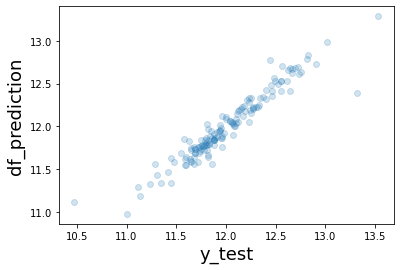

In [5150]:
df_prediction = xgb_reg.predict(x_test) 
plt.scatter(y_test, df_prediction, alpha=0.2) 
plt.xlabel('y_test',size=18) 
plt.ylabel('df_prediction',size=18) 
plt.show()

In [5151]:
#predictions with XGB Regressor
prediction=xgb_reg.predict(test_df)
prediction=np.expm1(prediction)
prediction_file=pd.DataFrame({'Id': test_id, 'SalePrice': prediction})

In [5152]:
#check how prediction data looks like
prediction_file

,Id,SalePrice
0,1461,128353.750000
1,1462,159882.640625
2,1463,189499.031250
3,1464,192321.375000
4,1465,189021.437500
...,...,...
1454,2915,79795.070312
1455,2916,81025.398438
1456,2917,151755.093750
1457,2918,116385.289062


In [5154]:
#descriptive statistics for prediction data
prediction_file['SalePrice'].describe()

count      1459.000000
mean     177091.906250
std       75159.875000
min       56293.687500
25%      127429.609375
50%      155877.609375
75%      207248.625000
max      511784.250000
Name: SalePrice, dtype: float64

In [5155]:
#save prediction_file as prediction.csv
prediction_file.to_csv('prediction.csv', index = False)